## Installations

In [ ]:
! pip install beautifulsoup4
! pip install requests
! pip install nltk

## Imports and Additional Downloads

In [ ]:
import requests
import time
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## URL and Headers

In [ ]:
# URLs

url_so = ["https://stackoverflow.com/questions/20940979/what-is-an-indexoutofrangeexception-argumentoutofrangeexception-and-how-do-i-f", "https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists"]
url_hwzone = ["https://www.hardwarezone.com.sg/tech-news-apple-blacklists-epic-games-and-disallow-fortnite-back-app-store", "https://www.hardwarezone.com.sg/tech-news-m2-powered-macbook-air-rumoured-launch-q3-2022"]
url_cna = ["https://www.channelnewsasia.com/world/australia-covid-19-sydney-unvaccinated-lockdown-freedom-2206346", "https://www.channelnewsasia.com/singapore/urban-farms-pesticide-free-vegetables-accreditation-scheme-singapore-2204351"]

# headers (to replicate on different machine use personal user agent for header)
headers={
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
}

## URL Request Verification

In [ ]:
# Ensure url requests work
for url in url_so:
  r1 = requests.get(url, headers=headers)
  if(r1.status_code!=200):
    print("Status Code: " + str(r1.status_code) + " Unable to send request to: " + url)
for url in url_hwzone:
  r1 = requests.get(url, headers=headers)
  if(r1.status_code!=200):
    print("Status Code: " + str(r1.status_code) + " Unable to send request to: " + url)
for url in url_cna:
  r1 = requests.get(url, headers=headers)
  if(r1.status_code!=200):
    print("Status Code: " + str(r1.status_code) + " Unable to send request to: " + url)

## Web Scrape

In [ ]:
# Read HTML
def read_text(url):
  article = requests.get(url, headers=headers)
  article_content = article.content
  soup_article = BeautifulSoup(article_content, 'html5lib')
  return soup_article

In [ ]:
# Return Final Stack Overflow Query Text
def final_text_so(soup_article):
  body = soup_article.find_all("div",class_="postcell post-layout--right")
  x = body[0].find_all(['p', 'pre'])
  list_paragraphs = []
  for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()        
        list_paragraphs.append(paragraph)
        
  final_article = " ".join(list_paragraphs)
  return final_article

In [ ]:
# Return Final Hardwarezone Article Text
def final_text_hwzone(soup_article):
  body = soup_article.find_all('div', class_='page')
  x = body[0].find_all('p')
  list_paragraphs = []
  for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()        
        list_paragraphs.append(paragraph)
        
  final_article = " ".join(list_paragraphs)
  return final_article

In [ ]:
# Return Final CNA Article Text
def final_text_cna(soup_article):
  body = soup_article.find_all('div', class_='text')
  list_paragraphs = []
  for para in body:
    x = para.find_all('p')
    for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()        
        list_paragraphs.append(paragraph)
        
  final_article = " ".join(list_paragraphs)  
  return final_article

In [ ]:
text_so = []
text_hwzone = []
text_cna = []
soup_article = ""

In [ ]:
text_so.clear()

for url in url_so:
  soup_article = read_text(url)
  final_text = final_text_so(soup_article)
  text_so.append(final_text)


### Scrape Verification (Stack Overflow)

In [ ]:
print(text_so[1])

Is there a shortcut to make a simple list out of a list of lists in Python? I can do it in a for loop, but is there some cool "one-liner"? I tried it with functools.reduce(): from functools import reduce
l = [[1, 2, 3], [4, 5, 6], [7], [8, 9]]
reduce(lambda x, y: x.extend(y), l)
 But I get this error: Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "<stdin>", line 1, in <lambda>
AttributeError: 'NoneType' object has no attribute 'extend'



### Scrape Modification (Stack Overflow)

In [ ]:
# Let's modify our web scrape to ensure that the code and text sections are extracted separately so they can be tokenized and tagged efficiently

def final_text_code_so(soup_article):
  body = soup_article.find_all("div",class_="postcell post-layout--right")
  x = body[0].find_all(['p'])     # extract paragraphs separately, but keep code embedded in paragraphs as it is considered essential to sentence
  list_paragraphs = []
  for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()        
        list_paragraphs.append(paragraph)

  x = body[0].find_all(['pre'])
  list_code = []
  for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()        
        list_code.append(paragraph)
  
        
  final_article = " ".join(list_paragraphs)
  #final_code = " ".join (list_code)
  return final_article, list_code   # Return code list without concatenation, to treat each code block as a token

### Modified Stack Overflow Scrape

Saves code elements from the Stack Overflow text in a separate variable.

In [ ]:
code_so = []
text_so.clear()
code_so.clear()

for url in url_so:
  soup_article = read_text(url)
  final_text, final_code = final_text_code_so(soup_article)
  text_so.append(final_text)
  code_so.append(final_code)

print(text_so)
print(code_so)

["I have some code and when it executes, it throws a IndexOutOfRangeException, saying,  Index was outside the bounds of the array. What does this mean, and what can I do about it? Depending on classes used it can also be ArgumentOutOfRangeException An exception of type 'System.ArgumentOutOfRangeException' occurred in mscorlib.dll but was not handled in user code Additional information: Index was out of range. Must be non-negative and less than the size of the collection.", 'Is there a shortcut to make a simple list out of a list of lists in Python? I can do it in a for loop, but is there some cool "one-liner"? I tried it with functools.reduce(): But I get this error:']
[[], ['from functools import reduce\nl = [[1, 2, 3], [4, 5, 6], [7], [8, 9]]\nreduce(lambda x, y: x.extend(y), l)\n', 'Traceback (most recent call last):\n  File "<stdin>", line 1, in <module>\n  File "<stdin>", line 1, in <lambda>\nAttributeError: \'NoneType\' object has no attribute \'extend\'\n']]


In [ ]:
tokenized_code_so = code_so   # each code block is a separate token of type "code" 

### Scrape and Verify HardwareZone and CNA Articles

In [ ]:
text_hwzone.clear()
text_cna.clear()

for url in url_hwzone:
  soup_article = read_text(url)
  final_text = final_text_hwzone(soup_article)
  text_hwzone.append(final_text)

print(text_hwzone)

for url in url_cna:
  soup_article = read_text(url)
  final_text = final_text_cna(soup_article)
  text_cna.append(final_text)

print(text_cna)

[' The Apple v. Epic saga continues.\xa0 After Epic Games’ lawsuit against Apple received a definitive ruling, Epic’s CEO Tim Sweeney has taken to Twitter to claim that, “Apple lied,” and is blocking Fortnite’s return to the App Store.\xa0 According to Sweeney, none of Epic Games’ applications will return to the App Store for now, as Apple has informed the company that its developer account will not be reinstated until the appeals process has been resolved. Sweeney states that this process could take as long as five years, making Fortnite’s future on the App Store pretty uncertain.\xa0 Apple lied. Apple spent a year telling the world, the court, and the press they’d "welcome Epic’s return to the App Store if they agree to play by the same rules as everyone else". Epic agreed, and now Apple has reneged in another abuse of its monopoly power over a billion users. Sweeney says, “Late last night, Apple informed Epic that Fortnite will be blacklisted from the Apple ecosystem until the exhau

## Tokenization

In [ ]:
tokenized_so=[]
tokenized_so.clear()
for text in text_so:
  tokenized_words=word_tokenize(text)
  tokenized_so.append(tokenized_words)


tokenized_hwzone=[]
tokenized_hwzone.clear()
for text in text_hwzone:
  tokenized_words=word_tokenize(text)
  tokenized_hwzone.append(tokenized_words)

tokenized_cna=[]
tokenized_cna.clear()
for text in text_cna:
  tokenized_words=word_tokenize(text)
  tokenized_cna.append(tokenized_words)


## Rudimentary Proper Noun Analysis 

Performed manually with tokenized text

In [ ]:
nnp_tokens_so = []
count_nnp_so=0
nnp_tokens_so.clear()

for lines in tokenized_so:
  index=0
  for w in lines:
    if(w != 'I' and w[0].isupper() and index!=0 and lines[index-1]!='.' and lines[index-1]!='?' and lines[index-1]!='!' and lines[index-1]!=':'):
      nnp_tokens_so.append(w)
      count_nnp_so=count_nnp_so+1
    index=index+1

nnp_tokens_hwzone = []
count_nnp_hwzone=0
nnp_tokens_hwzone.clear()

for lines in tokenized_hwzone:
  index=0
  for w in lines:
    if(w != 'I' and w[0].isupper() and index!=0 and lines[index-1]!='.' and lines[index-1]!='?' and lines[index-1]!='!' and lines[index-1]!=':'):
      nnp_tokens_hwzone.append(w)
      count_nnp_hwzone=count_nnp_hwzone+1
    index=index+1

nnp_tokens_cna = []
count_nnp_cna=0
nnp_tokens_cna.clear()

for lines in tokenized_cna:
  index=0
  for w in lines:
    if(w != 'I' and w[0].isupper() and index!=0 and lines[index-1]!='.' and lines[index-1]!='?' and lines[index-1]!='!' and lines[index-1]!=':' and lines[index-1]!='"'):
      nnp_tokens_cna.append(w)
      count_nnp_cna=count_nnp_cna+1
    index=index+1

print(nnp_tokens_so)
print(nnp_tokens_hwzone)
print(nnp_tokens_cna)

['IndexOutOfRangeException', 'Index', 'ArgumentOutOfRangeException', 'An', 'Additional', 'Python']
['Apple', 'Epic', 'Epic', 'Games', 'Apple', 'Epic', 'CEO', 'Tim', 'Sweeney', 'Twitter', 'Apple', 'Fortnite', 'App', 'Store', 'Sweeney', 'Epic', 'Games', 'App', 'Store', 'Apple', 'Fortnite', 'App', 'Store', 'Epic', 'App', 'Store', 'Apple', 'Late', 'Apple', 'Epic', 'Fortnite', 'Apple', 'In', 'Epic', 'Sweeney', 'Apple', 'Mark', 'A.', 'Perry', 'In', 'Epic', 'Apple', 'Epic', 'Apple', 'Apple', 'Fortnite', 'App', 'Store', 'Epic', 'Fortnite', 'App', 'Store', 'Fortnite', 'Apple', 'Sweeney', 'We', 'In', 'MacBook', 'Air', 'Ming-Chi', 'Kuo', 'M2-powered', 'MacBook', 'Air', 'Q3', 'July', 'Apple', 'Bloomberg', 'MacBook', 'Air', 'MagSafe', 'Asia', 'April', 'M2', 'July', 'MacBook', 'MacBook', 'Air', 'MacBook', 'Air']
['COVID-19', 'December', 'New', 'South', 'Wales', 'Premier', 'Gladys', 'Berejkilian', 'Tuesday', 'Sep', 'Australia', 'Oct', 'Dec', 'Dec', 'A', 'Berejiklian', 'Seven', 'News', 'Tuesday', 'Lif

### To Elaborate

While the rudimentary proper noun flagging code above correctly flagged only contextual proper nouns for the HardwareZone and CNA Articles, it flagged 1 proper noun ('Python') and 5 irregularly capitalised words ('IndexOutOfRangeException', 'Index', 'ArgumentOutOfRangeException', 'An', 'Additional') in Stack Overflow. On further inspection, it is evident that this is due to format and context of the piece of text. 

1. 'IndexOutOfRangeException' and 'ArgumentOutOfRangeException' are not regular words in the English language. They are exceptions returned by the compiler (which makes sense as Stack Overflow is a programming website).

2. End of sentence punctuation ('.' or '!' or '?') is not adequately used before 'Index' and 'An' because the author embeds these sentences as a response on the page. 

3. In the case of 'Additional' the author of the text seems to have made a grammatical error (which is not uncommon on Stack Overflow, as it is an informal information source).

## Filter Stop Words

In [ ]:
stop_words=tuple(stopwords.words("english"))

line=0
filtered_so=[]
filtered_so.clear()
for lines in tokenized_so:
  index=0
  for w in lines:
    if w.lower() not in stop_words:
        filtered_so.append(w)
    index=index+1
  temp=list(filtered_so[line:index+line])
  del filtered_so[line:index+line]
  filtered_so.append(temp)
  line=line+1

line=0
filtered_hwzone=[]
filtered_hwzone.clear()
for lines in tokenized_hwzone:
  index=0
  for w in lines:
    if w.lower() not in stop_words:
        filtered_hwzone.append(w)
    index=index+1
  temp=list(filtered_hwzone[line:index+line])
  del filtered_hwzone[line:index+line]
  filtered_hwzone.append(temp)
  line=line+1

line=0
filtered_cna=[]
filtered_cna.clear()
for lines in tokenized_cna:
  index=0
  for w in lines:
    if w.lower() not in stop_words:
        filtered_cna.append(w)
    index=index+1
  temp=list(filtered_cna[line:index+line])
  del filtered_cna[line:index+line]
  filtered_cna.append(temp)
  line=line+1

  


## Stopwords Visualised

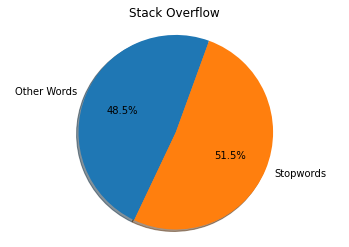

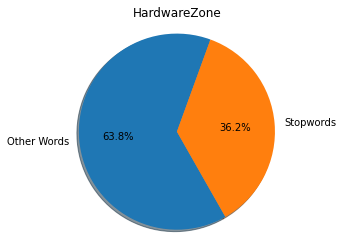

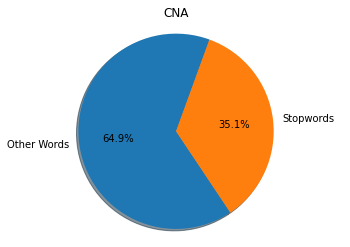

In [ ]:
 flat_tokenized_so=[item for sublist in tokenized_so for item in sublist]
 flat_filtered_so=[item for sublist in filtered_so for item in sublist]
 
 flat_tokenized_hwzone=[item for sublist in tokenized_hwzone for item in sublist]
 flat_filtered_hwzone=[item for sublist in filtered_hwzone for item in sublist]
 
 flat_tokenized_cna=[item for sublist in tokenized_cna for item in sublist]
 flat_filtered_cna=[item for sublist in filtered_cna for item in sublist]
 
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Other Words', 'Stopwords'
sizes = [(len( flat_filtered_so)/len(flat_tokenized_so))*100, 100*((len(flat_tokenized_so)-len( flat_filtered_so))/len(flat_tokenized_so))]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title('Stack Overflow')
plt.show()
print('\n')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Other Words', 'Stopwords'
sizes = [(len( flat_filtered_hwzone)/len(flat_tokenized_hwzone))*100, 100*((len(flat_tokenized_hwzone)-len( flat_filtered_hwzone))/len(flat_tokenized_hwzone))]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title('HardwareZone')
plt.show()
print('\n')
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Other Words', 'Stopwords'
sizes = [(len( flat_filtered_cna)/len(flat_tokenized_cna))*100, 100*((len(flat_tokenized_cna)-len( flat_filtered_cna))/len(flat_tokenized_cna))]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title('CNA')
plt.show()

### To Elaborate

We see that the Stack Overflow text contains a greater proportion of Stopwords when compared to that in the HardwareZone and CNA articles. 

This writing style may indicate that the Stack Overflow sentences are less dense i.e. have less specific information in its body of text.

## POS Tagging

### 1. Base Step

In [ ]:
tagged_so=[]
tagged_hwzone=[]
tagged_cna=[]

tagged_so.clear()
tagged_hwzone.clear()
tagged_cna.clear()

for line in tokenized_so:
  tagged_so.append(nltk.pos_tag(line))

for line in tokenized_hwzone:
  tagged_hwzone.append(nltk.pos_tag(line))

for line in tokenized_cna:
  tagged_cna.append(nltk.pos_tag(line))

print (tagged_so)

[[('I', 'PRP'), ('have', 'VBP'), ('some', 'DT'), ('code', 'NN'), ('and', 'CC'), ('when', 'WRB'), ('it', 'PRP'), ('executes', 'VBZ'), (',', ','), ('it', 'PRP'), ('throws', 'VBZ'), ('a', 'DT'), ('IndexOutOfRangeException', 'NNP'), (',', ','), ('saying', 'VBG'), (',', ','), ('Index', 'NNP'), ('was', 'VBD'), ('outside', 'IN'), ('the', 'DT'), ('bounds', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('array', 'NN'), ('.', '.'), ('What', 'WP'), ('does', 'VBZ'), ('this', 'DT'), ('mean', 'NN'), (',', ','), ('and', 'CC'), ('what', 'WP'), ('can', 'MD'), ('I', 'PRP'), ('do', 'VBP'), ('about', 'IN'), ('it', 'PRP'), ('?', '.'), ('Depending', 'VBG'), ('on', 'IN'), ('classes', 'NNS'), ('used', 'VBN'), ('it', 'PRP'), ('can', 'MD'), ('also', 'RB'), ('be', 'VB'), ('ArgumentOutOfRangeException', 'NNP'), ('An', 'DT'), ('exception', 'NN'), ('of', 'IN'), ('type', 'JJ'), ("'System.ArgumentOutOfRangeException", 'NN'), ("'", 'POS'), ('occurred', 'VBD'), ('in', 'IN'), ('mscorlib.dll', 'NN'), ('but', 'CC'), ('was', 'VBD')

### 2. Cleanup 

2.1. Based on the rudimentary proper noun analysis performed earlier.

In [ ]:
line=0

for lines in tagged_so:
  index=0
  
  for t in lines:
    
    if t[1]=="NNP":
      
      if t[0]=="IndexOutOfRangeException":
        tagged_so[line].append(tuple([t[0], "CODE"]))
        tagged_so[line].remove(t)
        index=index-1
      
      elif t[0]=="Index":
        tagged_so[line].append(tuple([t[0], "NN"]))
        tagged_so[line].remove(t)
        index=index-1

      elif t[0]=="ArgumentOutOfRangeException":
        tagged_so[line].append(tuple([t[0], "CODE"]))
        tagged_so[line].remove(t)
        index=index-1

      elif t[0]=="An":
        tagged_so[line].append(tuple([t[0], "DT"]))
        tagged_so[line].remove(t)
        index=index-1

      elif t[0]=="Additional":
        tagged_so[line].append(tuple([t[0], "JJ"]))
        tagged_so[line].remove(t)
        index=index-1
    
    index=index+1
  line=line+1




2.2. Tag code elements from Stack Overflow text 



In [ ]:
# flag embedded paragraph code to tag and place in "tagged_so"


line=0
for lines in tagged_so:
  index=0
  for w in lines:
    if (len(w[0])>1 and (w[0][1:] != w[0][1:].lower() and w[0][1:] != w[0][1:].upper() and "_" not in w[0] )) or (w[0].lower()=='for' and lines[index+1][0].lower()=='loop') or (w[0].lower()=='if' and lines[index+1][0].lower()=='statement') or(len(w[0])>1 and ('.' in w[0] or '_' in w[0] or '(' in w[0])):
      # checks for camelcase, for loop, if statement, functions/methods/variables
      if w[1]!='CODE':
        tagged_so[line].append(tuple([w[0], 'CODE']))
        tagged_so[line].remove(w)
        index=index-1
    
    index=index+1
  line=line+1

print(tagged_so)

[[('I', 'PRP'), ('have', 'VBP'), ('some', 'DT'), ('code', 'NN'), ('and', 'CC'), ('when', 'WRB'), ('it', 'PRP'), ('executes', 'VBZ'), (',', ','), ('it', 'PRP'), ('throws', 'VBZ'), ('a', 'DT'), (',', ','), ('saying', 'VBG'), (',', ','), ('was', 'VBD'), ('outside', 'IN'), ('the', 'DT'), ('bounds', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('array', 'NN'), ('.', '.'), ('What', 'WP'), ('does', 'VBZ'), ('this', 'DT'), ('mean', 'NN'), (',', ','), ('and', 'CC'), ('what', 'WP'), ('can', 'MD'), ('I', 'PRP'), ('do', 'VBP'), ('about', 'IN'), ('it', 'PRP'), ('?', '.'), ('Depending', 'VBG'), ('on', 'IN'), ('classes', 'NNS'), ('used', 'VBN'), ('it', 'PRP'), ('can', 'MD'), ('also', 'RB'), ('be', 'VB'), ('An', 'DT'), ('exception', 'NN'), ('of', 'IN'), ('type', 'JJ'), ("'", 'POS'), ('occurred', 'VBD'), ('in', 'IN'), ('but', 'CC'), ('was', 'VBD'), ('not', 'RB'), ('handled', 'VBN'), ('in', 'IN'), ('user', 'NN'), ('code', 'NN'), ('information', 'NN'), (':', ':'), ('Index', 'NN'), ('was', 'VBD'), ('out', 'IN'), 

### 3. Add 'CODE' Elements 

To Stack Overflow POS Tagged Tokens. 

In [ ]:
tagged_code_so=[]
tagged_code_so.clear()
line=0
for lines in tokenized_code_so:
  index=0
  for w in lines:
    tagged_code_so.append((w,"CODE"))
    index=index+1
  temp=list(tagged_code_so[line:index+line])
  del tagged_code_so[line:index+line]
  tagged_code_so.append(temp)
  line=line+1


line=0
for lines in tagged_so:
  tagged_so[line].extend(tagged_code_so[line])
  line=line+1
  

### 4. Exclude Stopwords

Place in a new variable, used for analysis purposes

In [ ]:
stop_words=tuple(stopwords.words("english"))

line=0
ftagged_so=[]
ftagged_so.clear()
for lines in tagged_so:
  index=0
  for w in lines:
    if w[0].lower() not in stop_words:
        ftagged_so.append(w)
    elif w[1]=='CODE':
        ftagged_so.append(w)
    index=index+1
  temp=list(ftagged_so[line:index+line])
  del ftagged_so[line:index+line]
  ftagged_so.append(temp)
  line=line+1

line=0
ftagged_hwzone=[]
ftagged_hwzone.clear()
for lines in tagged_hwzone:
  index=0
  for w in lines:
    if w[0].lower() not in stop_words:
        ftagged_hwzone.append(w)
    index=index+1
  temp=list(ftagged_hwzone[line:index+line])
  del ftagged_hwzone[line:index+line]
  ftagged_hwzone.append(temp)
  line=line+1

line=0
ftagged_cna=[]
ftagged_cna.clear()
for lines in tagged_cna:
  index=0
  for w in lines:
    if w[0].lower() not in stop_words:
        ftagged_cna.append(w)
    index=index+1
  temp=list(ftagged_cna[line:index+line])
  del ftagged_cna[line:index+line]
  ftagged_cna.append(temp)
  line=line+1

  

## Obtain POS Counts

In [ ]:


flat_tagged_so=[item for sublist in tagged_so for item in sublist]
counts_so = Counter( tag for word,  tag in flat_tagged_so).most_common()
counts_so={k:v for k,v in counts_so}
print("Tagged Stack Overflow POS Counts: "+ str(counts_so))

flat_ftagged_so=[item for sublist in ftagged_so for item in sublist]
fcounts_so = Counter( tag for word,  tag in flat_ftagged_so).most_common()
fcounts_so={k:v for k,v in fcounts_so}
print("Tagged and Filtered Stack Overflow POS Counts: "+ str(fcounts_so))

flat_tagged_hwzone=[item for sublist in tagged_hwzone for item in sublist]
counts_hwzone = Counter( tag for word,  tag in flat_tagged_hwzone).most_common()
counts_hwzone={k:v for k,v in counts_hwzone}
print("Tagged Hardware Zone POS Counts: "+ str(counts_hwzone))

flat_ftagged_hwzone=[item for sublist in ftagged_hwzone for item in sublist]
fcounts_hwzone = Counter( tag for word,  tag in flat_ftagged_hwzone).most_common()
fcounts_hwzone={k:v for k,v in fcounts_hwzone}
print("Tagged and Filtered Hardware Zone POS Counts: "+ str(fcounts_hwzone))

flat_tagged_cna=[item for sublist in tagged_cna for item in sublist]
counts_cna = Counter( tag for word,  tag in flat_tagged_cna).most_common()
counts_cna={k:v for k,v in counts_cna}
print("Tagged CNA POS Counts: "+ str(counts_cna))

flat_ftagged_cna=[item for sublist in ftagged_cna for item in sublist]
fcounts_cna = Counter( tag for word,  tag in flat_ftagged_cna).most_common()
fcounts_cna={k:v for k,v in fcounts_cna}
print("Tagged and Filtered CNA POS Counts: "+ str(fcounts_cna))





Tagged Stack Overflow POS Counts: {'NN': 18, 'IN': 17, 'DT': 14, 'PRP': 11, 'CODE': 8, 'CC': 6, '.': 6, 'VBZ': 5, ',': 5, 'VBD': 5, 'JJ': 5, 'VB': 4, 'VBP': 3, 'NNS': 3, 'MD': 3, 'RB': 3, ':': 3, 'VBG': 2, 'WP': 2, 'VBN': 2, 'NNP': 2, 'WRB': 1, 'POS': 1, 'JJR': 1, 'EX': 1, 'TO': 1, '``': 1, "''": 1, '(': 1, ')': 1}
Tagged and Filtered Stack Overflow POS Counts: {'NN': 18, 'CODE': 8, '.': 6, ',': 5, 'JJ': 5, 'NNS': 3, ':': 3, 'VBZ': 2, 'VBG': 2, 'VBN': 2, 'VBD': 2, 'NNP': 2, 'IN': 1, 'RB': 1, 'POS': 1, 'JJR': 1, 'VB': 1, '``': 1, "''": 1, '(': 1, ')': 1, 'VBP': 1}
Tagged Hardware Zone POS Counts: {'NNP': 99, 'NN': 70, 'IN': 60, 'DT': 43, 'JJ': 35, ',': 25, 'RB': 23, 'VB': 22, 'VBZ': 21, 'TO': 20, '.': 19, 'VBD': 19, 'NNS': 16, 'VBN': 12, 'VBG': 11, 'MD': 10, 'PRP': 8, 'CC': 7, 'VBP': 7, 'CD': 5, 'PRP$': 4, 'JJR': 4, 'WDT': 3, 'RP': 2, ':': 2, 'POS': 2, 'RBR': 2, 'FW': 1, '``': 1, "''": 1, 'WP': 1}
Tagged and Filtered Hardware Zone POS Counts: {'NNP': 99, 'NN': 66, 'JJ': 26, ',': 25, '.'

## POS Analysis

### 1. Stack Overflow Overview

POS Overview of Unfiltered (blue) and Filtered (orange) Tokens


*To note: Keep in mind that the filtered (orange) tokens are a subset of unfiltered (blue) tokens when interpreting the graph.*

<BarContainer object of 22 artists>

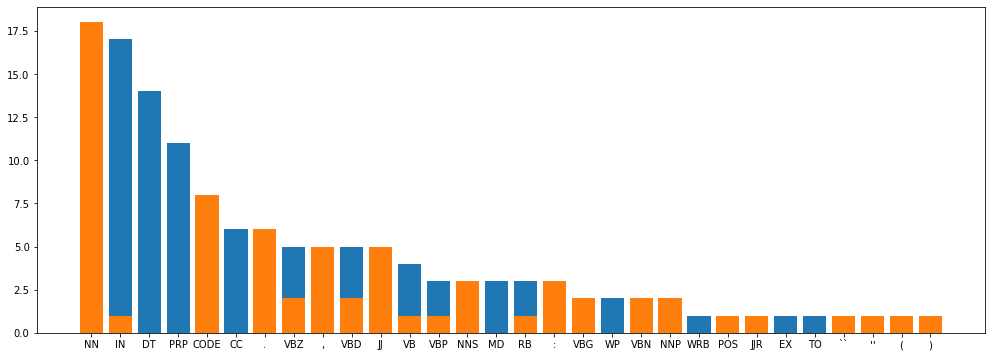

In [ ]:
plt.figure(figsize=(17,6))
plt.bar(counts_so.keys(), counts_so.values())
plt.bar(fcounts_so.keys(), fcounts_so.values())

### 2. HardwareZone Overview

POS Overview of Unfiltered (blue) and Filtered (orange) Tokens

*To note: Keep in mind that the filtered (orange) tokens are a subset of unfiltered (blue) tokens when interpreting the graph.*

<BarContainer object of 24 artists>

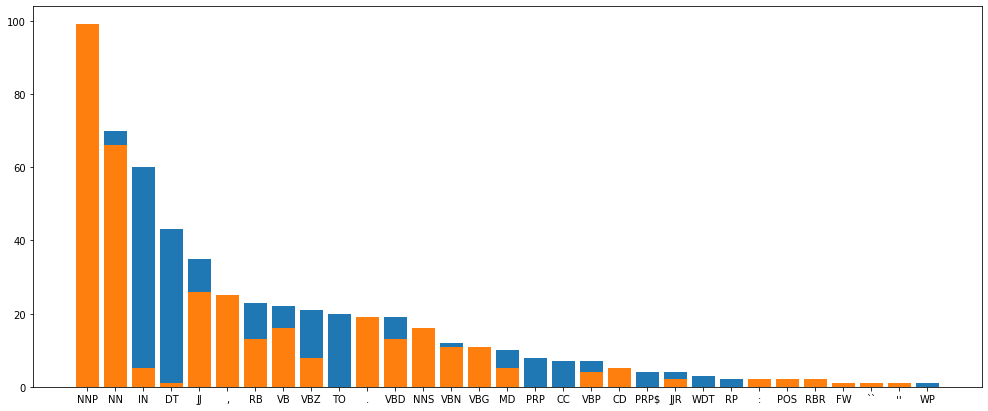

In [ ]:
plt.figure(figsize=(17,7))
plt.bar(counts_hwzone.keys(), counts_hwzone.values())
plt.bar(fcounts_hwzone.keys(), fcounts_hwzone.values())

### 3. CNA Overview

POS Overview of Unfiltered (blue) and Filtered (orange) Tokens

*To note: Keep in mind that the filtered (orange) tokens are a subset of unfiltered (blue) tokens when interpreting the graph.*

<BarContainer object of 29 artists>

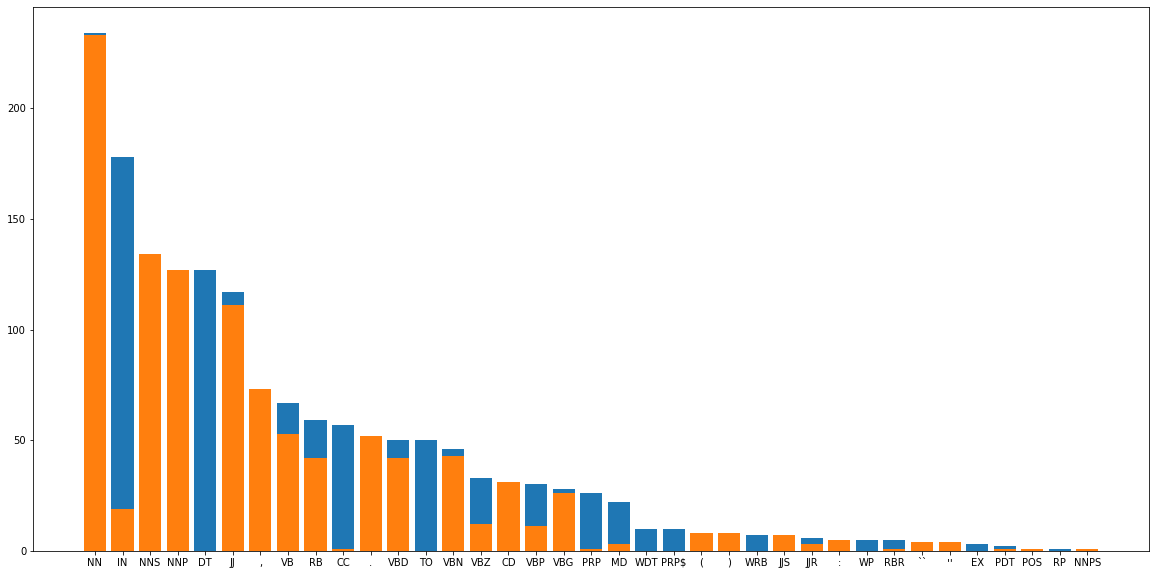

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(counts_cna.keys(), counts_cna.values())
plt.bar(fcounts_cna.keys(), fcounts_cna.values())





# The Personal Pronoun and Proper Noun Usage seem to vary greatly between all the texts. Let's look further. 

### 4. Comparative Analysis of Personal Pronoun Usage


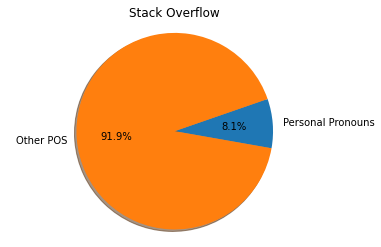

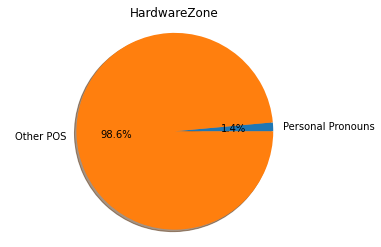

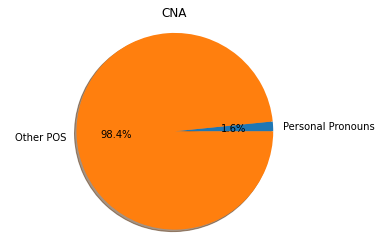

In [ ]:
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Personal Pronouns', 'Other POS'
sizes = [(counts_so['PRP']/sum(counts_so.values()))*100, 100- ((counts_so['PRP']/sum(counts_so.values()))*100)]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=350)
ax1.axis('equal')  
plt.title('Stack Overflow')
plt.show()
print('\n')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Personal Pronouns', 'Other POS'
sizes = [(counts_hwzone['PRP']/sum(counts_hwzone.values()))*100, 100- ((counts_hwzone['PRP']/sum(counts_hwzone.values()))*100)]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  
plt.title('HardwareZone')
plt.show()
print('\n')
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Personal Pronouns', 'Other POS'
sizes = [(counts_cna['PRP']/sum(counts_cna.values()))*100, 100- ((counts_cna['PRP']/sum(counts_cna.values()))*100)]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  
plt.title('CNA')
plt.show()

### To Elaborate

We notice that personal pronouns are used with far greater frequency in the Stack Overflow text. 

There is, therefore, an indication of a more individualistic/personal focussed writing style in the StackOverflow text as opposed to the HardwareZone/CNA articles.


This hypothesis can be confirmed by looking further into the nature of the texts:
1. Stack Overflow is a forum wherein users pose technical questions based on their individual concerns. Therefore, there is naturally a heavy focus on individual experience, explaining the high frequency use of personal prounouns. 

2. In contrast, HardwareZone and CNA handle journalistic issues from an outside objective perspective, making there little use for personal pronouns.

### 5. Comparative Analysis of Proper Noun Usage

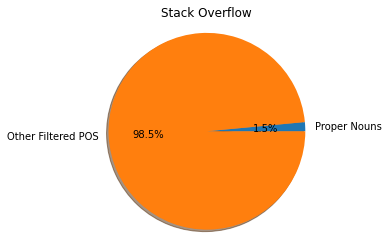

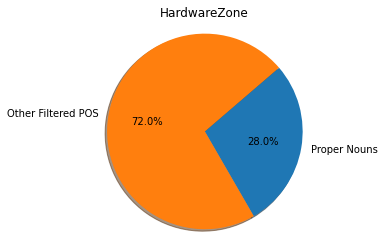

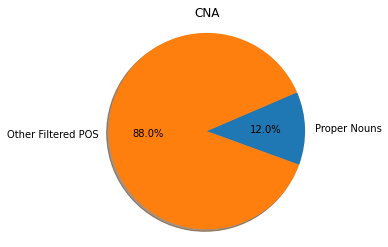

In [ ]:
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Proper Nouns', 'Other Filtered POS'
sizes = [(fcounts_so['NNP']/sum(counts_so.values()))*100, 100- ((fcounts_so['NNP']/sum(fcounts_so.values()))*100)]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  
plt.title('Stack Overflow')
plt.show()
print('\n')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Proper Nouns', 'Other Filtered POS'
sizes = [(fcounts_hwzone['NNP']/sum(fcounts_hwzone.values()))*100, 100- ((fcounts_hwzone['NNP']/sum(fcounts_hwzone.values()))*100)]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=300)
ax1.axis('equal')  
plt.title('HardwareZone')
plt.show()
print('\n')
 # Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Proper Nouns', 'Other Filtered POS'
sizes = [(fcounts_cna['NNP']/sum(fcounts_cna.values()))*100, 100- ((fcounts_cna['NNP']/sum(fcounts_cna.values()))*100)]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=340)
ax1.axis('equal')  
plt.title('CNA')
plt.show()

### To elaborate

There seems to be a higher frequency of proper nouns in the HardwareZone Articles, followed by the CNA Articles. There are very few proper nouns in the Stack Overflow text.

This can again be attributed to the nature of the texts:

1. The HardwareZone articles reference important company developments and launches in the technological sphere. Here the writing style is very impersonal and information heavy. The high frequency of proper nouns indicates a focus on third-party referential detailed information.

2. The CNA articles also have a focus on third-party, high-volume information, but the proper noun usage in their writing style indicates that certain information may not be as specific (when compared to the HardwareZone article). 

3. The Stack Overflow text does not relay or reference nearly as many third parties as the previous two pieces of text, as it is not a diverse (in terms of information) or objective information source. 